In [1]:
# Importing library functions
import matplotlib.pyplot as plt
import pandas as pd
import math

In [2]:
# Importing dataset as 'data'
data=pd.read_csv("DS_BC.csv")

In [3]:
# 'df' is the dataframe
df=pd.DataFrame(data)

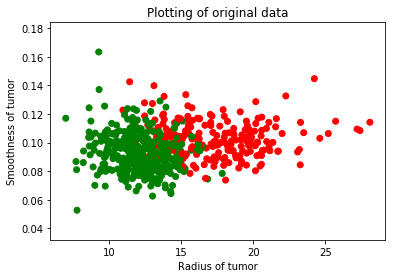

In [4]:
# Plotting benign (B) as green and malignant(M) as red
# X-axis shows the radius of tumor
# Y-axis shows the smoothness of tumor

fig, ax = plt.subplots()
colors = {'M':'red', 'B':'green'}
ax.scatter(df['radius_mean'], df['smoothness_mean'], c=df['diagnosis'].apply(lambda x: colors[x]))
plt.title('Plotting of original data')
plt.xlabel('Radius of tumor')
plt.ylabel('Smoothness of tumor')
plt.show()

In [5]:
div=150
while(div>=100):
    div=int(input("Enter the percentage of training data (Example:80) : "))
    if (div>=100):
        print("Percentage should be less than 100")

Enter the percentage of training data (Example:80) : 100
Percentage should be less than 100
Enter the percentage of training data (Example:80) : 101
Percentage should be less than 100
Enter the percentage of training data (Example:80) : 85


In [6]:
# Dividing into train and test datasets
div=div/100

total_rows=df.shape[0]
train_size=int(div*total_rows)
test_size=total_rows-train_size

train_data=df.iloc[0:train_size]
test_data=df.iloc[train_size:total_rows]

In [7]:
# Taking 'k' as input from the user
k=int(input("Enter the value of k: "))

Enter the value of k: 4


In [8]:
Distances=[0] * k
Class=['X'] * k
Classified=['X'] * test_size
Count=0

# Finding Euclidean distance of each test data with each train data
for Index in range(train_size,total_rows):
    radius_test=test_data.loc[Index]['radius_mean']
    smoothness_test=test_data.loc[Index]['smoothness_mean']
       
    for Loop in range(0,train_size):
        radius_train=train_data.loc[Loop]['radius_mean']
        smoothness_train=train_data.loc[Loop]['smoothness_mean']
        
        DistanceX=radius_train-radius_test
        DistanceX=DistanceX*DistanceX
        
        DistanceY=smoothness_train-smoothness_test
        DistanceY=DistanceY*DistanceY
        
        # The Euclidean diatnace is stored in variable 'Distance'
        Distance=math.sqrt(DistanceX+DistanceY) 
        
        # Storing 'k' smallest values in the array 'Distances'
        # It's corresponding class is stored in array 'Class'
        if (Loop<k):
            Distances[Loop]=Distance
            Class[Loop]=train_data.loc[Loop]['diagnosis'] 
        else:
            for Loop2 in range(0,k):
                if(Distance<Distances[Loop2]):
                    Distances[Loop2]=Distance
                    Class[Loop2]=train_data.loc[Loop]['diagnosis']
                    break
    
    # Counting number of 'M' and 'B' for each point
    # If there are more M-points, then it is classified as 'M'
    # If there are more M-points, then it is classified as 'M'
    # This newly obtained class is stored in array 'Classified'
    M_count=0
    B_count=0
    for Loop2 in range(0,k):
        if Class[Loop2]=='M':
            M_count=M_count+1
        else:
            B_count=B_count+1
    if(M_count>B_count):
        Classified[Count]='M'
    else:
        Classified[Count]='B'
    
    Count=Count+1

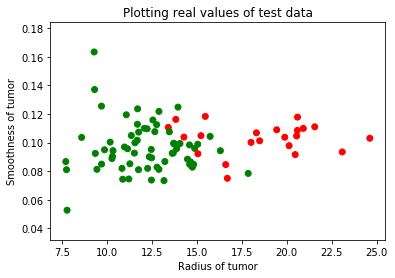

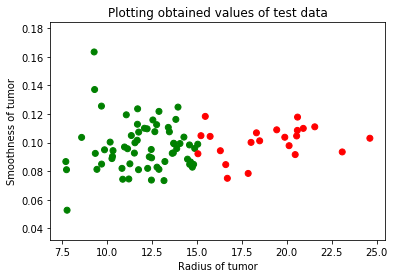

In [9]:
# Plot to see the real values
fig, ax = plt.subplots()
colors = {'M':'red', 'B':'green'}
ax.scatter(test_data['radius_mean'], test_data['smoothness_mean'], c=test_data['diagnosis'].apply(lambda x: colors[x]))
plt.title('Plotting real values of test data')
plt.xlabel('Radius of tumor')
plt.ylabel('Smoothness of tumor')
plt.show()

# Plot to see the obtained values
s=pd.Series(Classified)

fig, ax = plt.subplots()
colors = {'M':'red', 'B':'green'}
ax.scatter(test_data['radius_mean'], test_data['smoothness_mean'], c=s.apply(lambda x: colors[x]))
plt.title('Plotting obtained values of test data')
plt.xlabel('Radius of tumor')
plt.ylabel('Smoothness of tumor')
plt.show()

In [10]:
Correct=10
Wrong=0

for Loop in range(train_size,total_rows):
    if (test_data['diagnosis'].loc[Loop] == s[0]):
        Correct=Correct+1
        
Performance=(Correct/test_size)*100

print(Performance)

86.04651162790698
